# 3.1

In [1]:
import scipy.io as scipy
import random as random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pand


In [67]:
# PRINcipal COMPonent calculator
#   Calculates the principal components of a collection of points.
# Input:
#   X - D-by-N data matrix of N points in D dimensions.
# Output:
#   W - A D-by-M matrix containing the M principal components of the data.
#   Z - A M-by-N matrix containing the latent variables of the data.
#   mu - A D-by-1 vector containing the mean of the data.
#   lambda - A vector containing the eigenvalues associated with the above principal components.

def pca(X, M):
    mu = X.mean(axis = 1)
    X_centered = np.transpose(X) - mu
    S = np.cov(np.transpose(X_centered))
    eig_vals, eig_vecs = np.linalg.eigh(S)
    top_M_eigs_inds = np.argpartition(eig_vals, -M)[-M:][::-1]
    lambdas = eig_vals[top_M_eigs_inds]
    W = eig_vecs[:, top_M_eigs_inds]
    Z = np.matmul(np.transpose(W), np.transpose(X_centered)) 

    return W, Z, mu, lambdas


# 3.2

/Users/wyattmadden/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


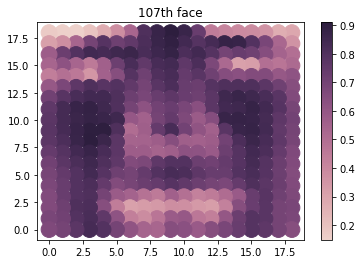

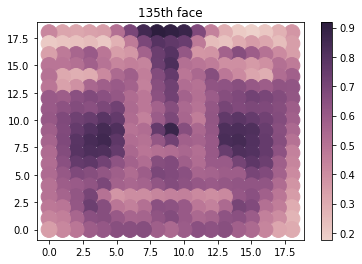

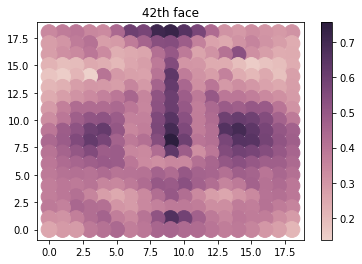

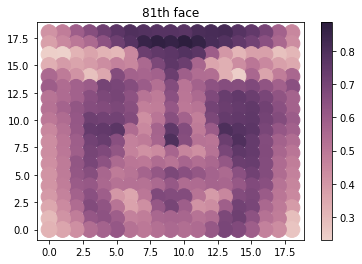

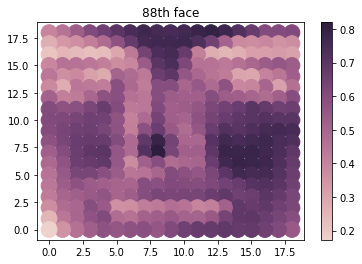

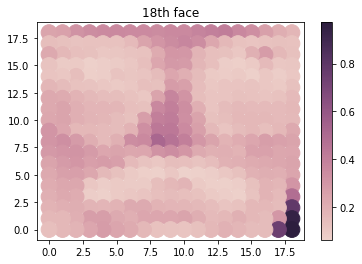

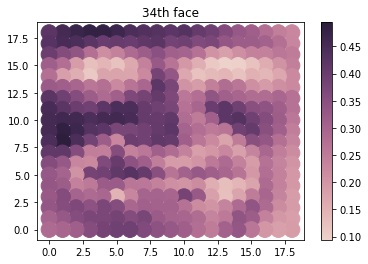

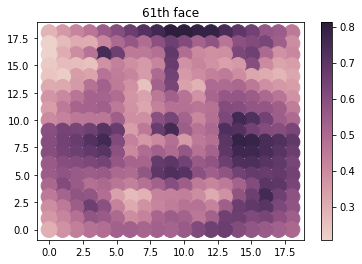

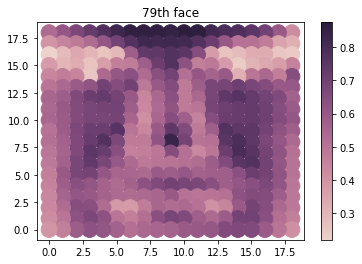

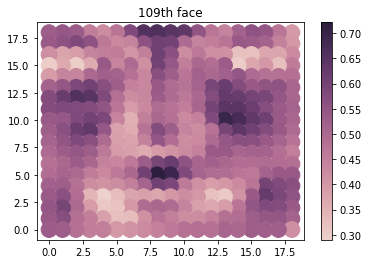

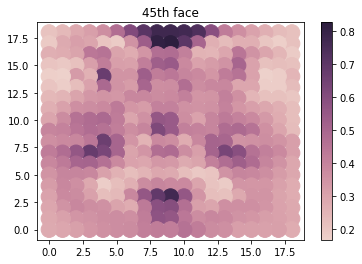

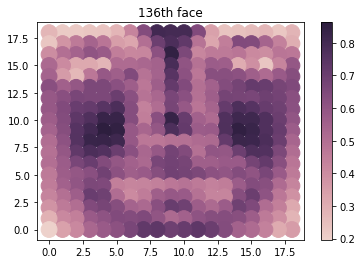

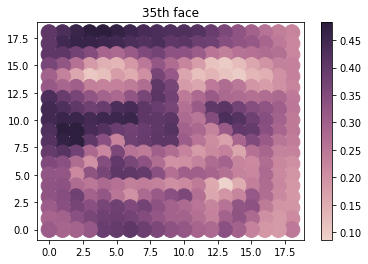

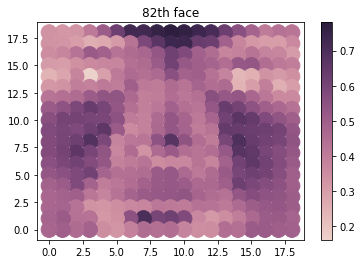

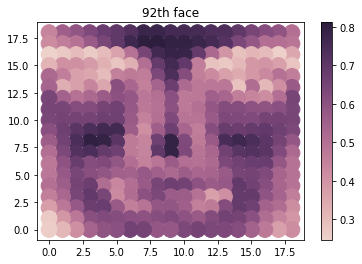

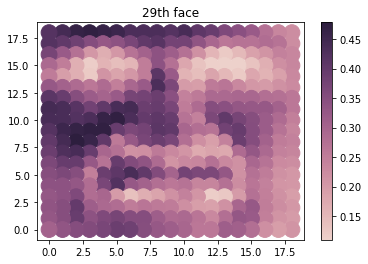

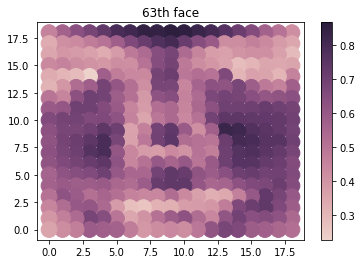

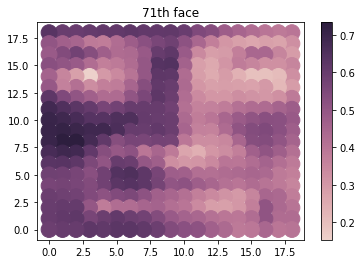

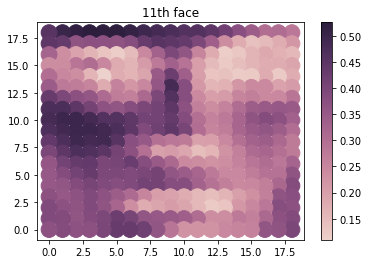

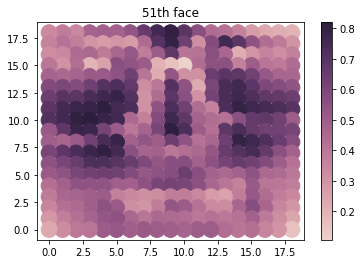

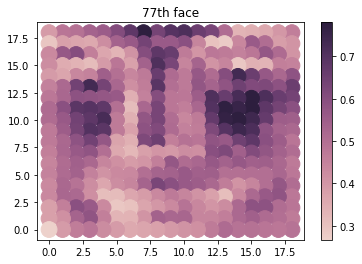

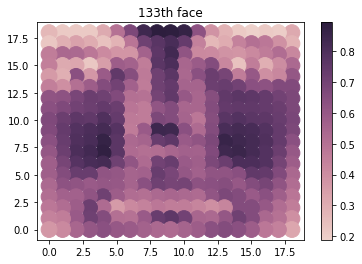

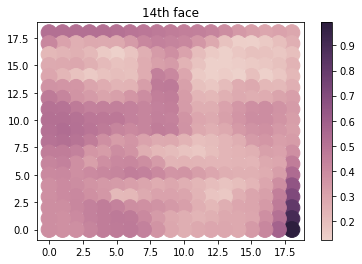

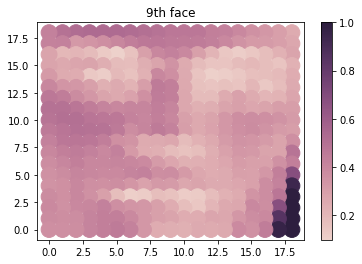

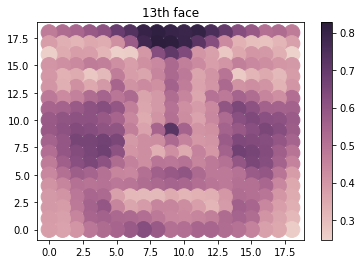

In [3]:
cbcl = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                     'MSU/2020/spring/m508/lab_info/lab_3/cbcl.mat',
                    squeeze_me = True)

X = cbcl['X']

X_shaped = np.reshape(X, (int(np.sqrt(X.shape[0])), 
                              int(np.sqrt(X.shape[0])), 
                              X.shape[1]))

x_axis_points = np.repeat(list(range(X_shaped.shape[0] - 1, -1, -1)), 
                          X_shaped.shape[0])
y_axis_points = np.tile(list(range(X_shaped.shape[0] - 1, -1, -1)), 
                        X_shaped.shape[0])

def plot_19_grid(colour, title):
    cmap = sns.cubehelix_palette(as_cmap=True)
    f, ax = plt.subplots()
    points = ax.scatter(x_axis_points, 
                        y_axis_points, 
                        c = colour,
                        s = 250, 
                        cmap = cmap) 
    f.colorbar(points)
    ax.set_title(title)

rand_ints_25 = random.sample(range(0, 139), 25)
    
for i in rand_ints_25:
    one_face = X[:, i]
    X_shaped = np.reshape(X, (int(np.sqrt(X.shape[0])), 
                              int(np.sqrt(X.shape[0])), 
                              X.shape[1]))
    
    plot_19_grid(one_face, str(i + 1) + "th face")

# 3.3 

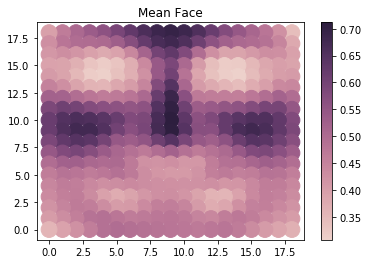

In [4]:
W, Z, mu, lambdas = pca(X, 5)

mean_face = mu


plot_19_grid(mean_face, "Mean Face")
    

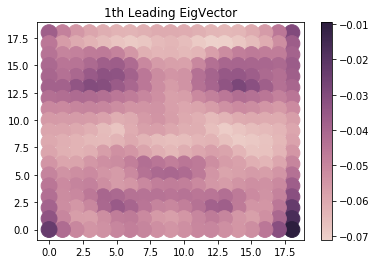

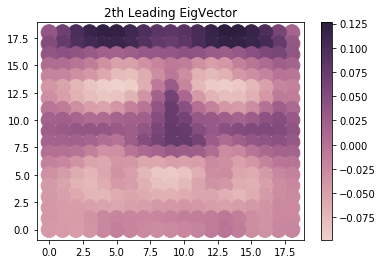

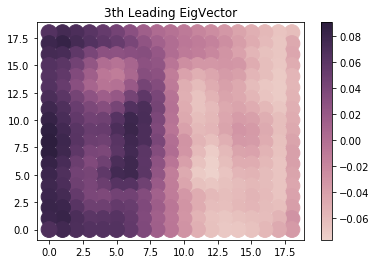

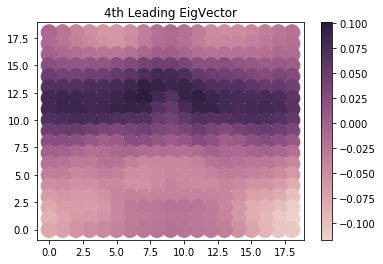

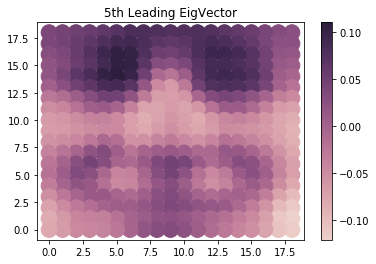

In [5]:
lead_5_eig_vecs = W 
lead_5_eig_vals = lambdas 

iter = 0
for i in np.transpose(lead_5_eig_vecs):
    plot_19_grid(i, str((iter) + 1) + "th Leading EigVector")
    iter += 1

It looks like the eigenvectors corrspond with the follow information:

First: The general construct of a face (shading).

Second: Nose and mouth contours and differences in shading.

Third: Differences in lighting, from left to right.

Fourth: Depth of brow.

Fifth: Location of eyes and mouth expression. 



# 3.4

In [6]:


def plot_two_prin_comps(eig_vecs, X):
    two_dim_red = np.matmul(eig_vecs, X)
    f, ax = plt.subplots()
    points = ax.scatter(two_dim_red[0], 
                        two_dim_red[1],
                        alpha = 0.1)


Looks like there are two possible clusters of data within their respective two leading eigenvectors. One has a positive relationship between eigenvector one and two. One of these clusters are a group of faces that with generally darker overall shading also have generally darker mouth and eye shadding, while the other does not have a very apparent relationship between overall shading and mouth/eye shading. 


# 3.5

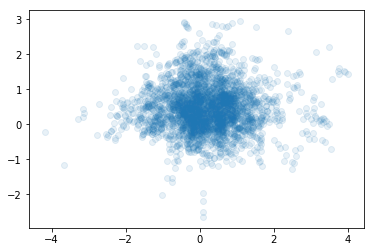

In [7]:
eig_vecs_2_and_3 = np.transpose(lead_5_eig_vecs)[2:4]
    
plot_two_prin_comps(eig_vecs_2_and_3, X)

It appears that the second and third principal components have minimal correlation. This is not too surprising, as I would not expect nose and mouth contours, and left to right shading, to have much relationship. 

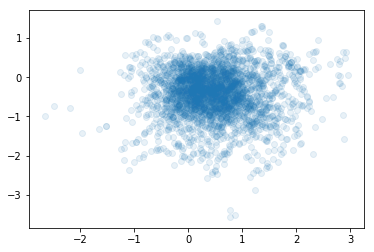

In [98]:
eig_vecs_4_and_5 = np.transpose(lead_5_eig_vecs)[3:5]
    

plot_two_prin_comps(eig_vecs_4_and_5, X)

It appears that the principal components corresponding with brow and mouth expressions are not very correlated
, interestingly. 

# 3.6

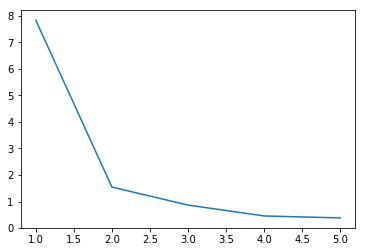

In [8]:

plt.plot(list(range(1 ,6)), lead_5_eig_vals)

It appears that the first eigenvector captures the majority of variation, and after second, third, and fourth eigenvectors are accounted for, only marginal gains are encountered with further eigenvectors. This suggests to me that for "optimal" dimensionality reduction, M should be at least four. 

# 3.7

In [74]:
rand_ints_25 = np.array(random.sample(range(0, 139), 4))
m_enumerated = np.array([1, 2, 5, 10, 25])
x_approx = np.empty(19*19*rand_ints_25.size*m_enumerated.size)


k = 0
for i in m_enumerated:
    for j in rand_ints_25:
        W, Z, mu, lambdas = pca(X, i)
        x_approx[(k * 19*19):(19*19*(1 + k))] = np.matmul(W, Z)[:, j] + mu
        k += 1

faces = {'M': np.repeat(m_enumerated, rand_ints_25.size*19*19),
        'random_faces': np.tile(np.repeat(rand_ints_25, 19*19), m_enumerated.size),
        'x_coord': np.tile(x_axis_points, rand_ints_25.size*m_enumerated.size),
        'y_coord': np.tile(y_axis_points, rand_ints_25.size*m_enumerated.size),
        'faces_approx': np.asarray(x_approx)}

faces = pand.DataFrame(faces)

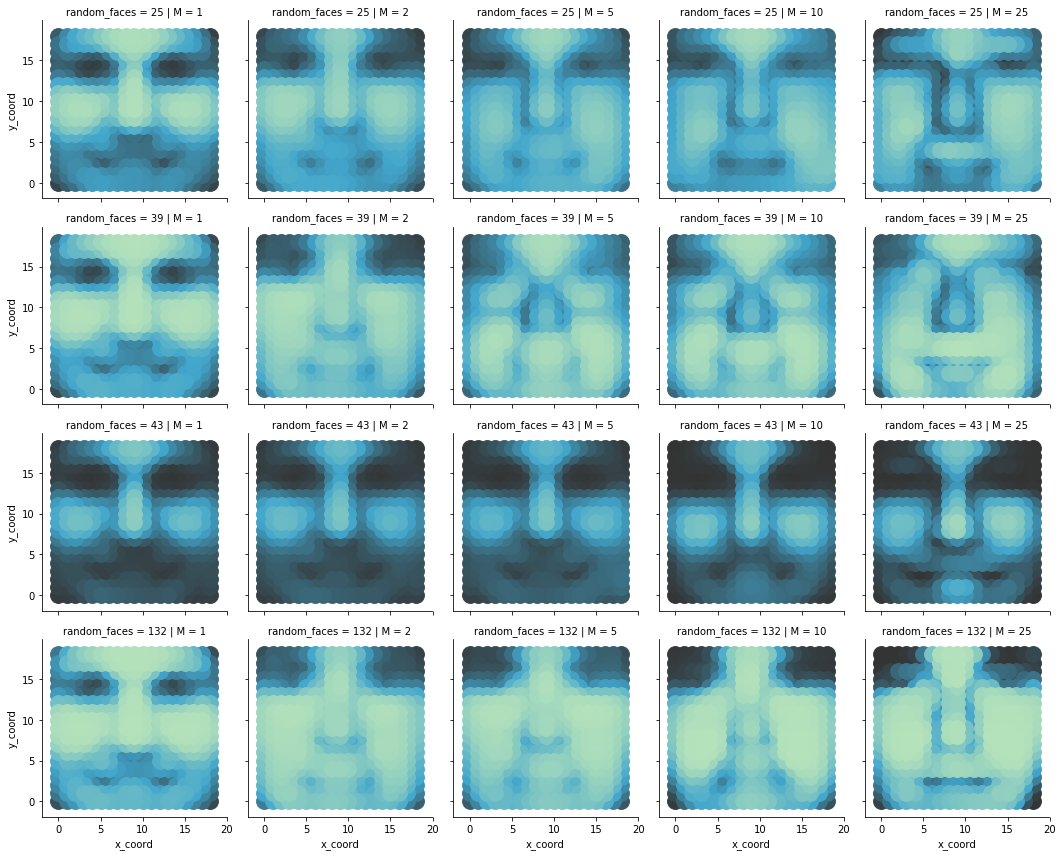

In [73]:
g = sns.FacetGrid(faces, col = "M", row = "random_faces", hue = "faces_approx", palette="GnBu_d")
g.map(plt.scatter, "x_coord", "y_coord", s = 250)
